<a href="https://colab.research.google.com/github/Mr-Katakitchen/ML-NTUA/blob/main/lab1/MM2024_25_Lab2_3_NaiveBayesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚠️
Επισημαίνεται ότι η σχεδίαση και το περιεχόμενο του notebook αποτελούν αντικείμενο πνευματικής ιδιοκτησίας.

# Naive Bayes Classification

Η τεχνική **Naive Bayes Classifier** βασίζεται στο λεγόμενο θεώρημα Bayes και είναι ιδιαίτερα κατάλληλη όταν η διάσταση της εισόδου είναι υψηλή. Παρά την απλότητά του, το Naive Bayes μπορεί συχνά να ξεπεράσει τις πιο εξελιγμένες μεθόδους ταξινόμησης.

### Bayes' Theorem

Ο αλγόριθμος βασίζεται στο περίφημο θεώρημα Bayes:

$${\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}},}$$

όπου $A$ και $B$ είναι συμβάντα,$P(B)\neq{0}$, $P(A\mid B)$ και $P(B\mid A)$ είναι οι υπό συνθήκη πιθανότητες και $P(A)$ και $P(B)$ είναι οι  οριακές πιθανότητες παρατήρησης των Α και Β τα οποία είναι ανεξάρτητα μεταξύ τους.


### Τι είναι το _Naive_ στο Naive Bayes και γιατί είναι ένας εξαιρετικά γρήγορος αλγόριθμος;

Ονομάζεται αφελής Bayes επειδή ο υπολογισμός των πιθανοτήτων για κάθε υπόθεση είναι απλοποιημένος και εύκολα εφαρμόσιμος: θεωρούμε ότι οι τιμές κάθε τιμής χαρακτηριστικού είναι ανεξάρτητες υπό όρους, δεδομένης της τιμής στόχου.

Αυτή είναι μια πολύ ισχυρή υπόθεση που είναι πιο απίθανη σε πραγματικά δεδομένα, δηλαδή ότι τα χαρακτηριστικά είναι ανεξάρτητα μεταξύ τους. Παρόλα αυτά, η προσέγγιση αποδίδει εκπληκτικά καλά σε δεδομένα όπου αυτή η υπόθεση ισχύει…

Η εκπαίδευση είναι γρήγορη γιατί μόνο η πιθανότητα κάθε τάξης και η πιθανότητα κάθε κατηγορίας με διαφορετικές τιμές εισόδου πρέπει να υπολογιστούν.

**Δεν χρειάζεται να προσαρμόζονται συντελεστές με διαδικασίες βελτιστοποίησης**

Οι πιθανότητες της class  είναι απλώς η συχνότητα των περιπτώσεων που ανήκουν σε κάθε κατηγορία διαιρεμένη με τον συνολικό αριθμό των περιπτώσεων. Οι πιθανότητες υπό όρους είναι η συχνότητα κάθε τιμής χαρακτηριστικού για μια δεδομένη class διαιρεμένη με τη συχνότητα των περιπτώσεων με αυτήν την class.

**Παράδειγμα με κατηγορικές μεταβλητές**

Έστω ότι για 14 μέρες παρατηρήσαμε 4 μεταβλητές του καιρού (νεφοκάλυψη, θερμοκρασία, υγρασία και άνεμο) και το αν τελικά παίξαμε τέννις. Τα χαρακτηριστικά μας είναι κατηγορικά, παίρνουν δηλαδή διακριτές τιμές από ένα ορισμένο σύνολο τιμών.

Το πρώτο βήμα είναι να γράψουμε 4 πίνακες αναφοράς ("look-up tables"), έναν για κάθε χαρακτηριστικό, με την πιθανότητα να παιχτεί ή να μην παιχτεί τέννις σε σχέση με το χαρακτηριστικό.

![](https://drive.google.com/uc?id=1snRc9LiNQup0RKBL3ZP41JM0Y0PxkheL)

**Testing**

Έστω ένα νέο δείγμα X = (Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong). Σε ποια κατηγορία ανήκει; (θα παίξουμε τέννις ή όχι).

Υπολογίζουμε πρώτα από τους πίνακες αναφοράς την "πιθανότητα" να παίξουμε

P(Sunny|p)* P(Cool|p) * P(High|p) * P(Strong|p)


Σύμφωνα με τον κανόνα ταξινόμησης του NB η πιθανότητα να παίξουμε είναι ανάλογη του γινομένου των προηγούμενων

P(X|p)P(p) =P(Sunny|p)* P(Cool|p) * P(High|p) * P(Strong|p) = (2/9) * (3/9) * (3/9) * (3/9) * (9/14) = 0.0053

Υπολογίζουμε παρόμοια την πιθανότητα να μην παίξουμε
P(X|p)P(p) =P(Sunny|n)* P(Cool|n) * P(High|n) * P(Strong|n)=(3/5) * (1/5) * (4/5) * (3/5) * (5/14) = 0.0206

Επειδή η ποσότητα 0.0206 είναι μεγαλύτερη από την 0.0053, η απόφαση του Naive Bayes είναι να μην παίξουμε τέννις. Οι ποσότητες αυτές (του αριθμητή) μας αρκούν για την απόφαση γιατί ο παρονομαστής είναι σταθερός. Για να πάρουμε τις πλήρεις πιθανότητες για το συγκεκριμένο δείγμα Χ υπολογίζουμε και τον παρονομαστή:

P(X) = P(Sunny)* P(Cool) * P(High) * P(Strong) = (5/14) * (4/14) * (7/14) * (6/14) = 0.02186

P(p) = 0.0053/0.02186 = 0.2425

P(n) = 0.0206/0.02186 = 0.9424

# Naive Bayes Classification χρησιμοποιώντας το σύνολο δεδομένων Wine data (UCI ML Repo)

### Δεδομένα
θα δείξουμε πώς να χρησιμοποιήσετε τη μέθοδο Naive Bayes της Python scikit-learn για την ταξινόμηση της προέλευσης του κρασιού με βάση τη φυσικοχημική δεδομένα ανάλυσης. Αυτά τα δεδομένα είναι τα αποτελέσματα μιας χημικής ανάλυσης κρασιών που καλλιεργούνται στην ίδια περιοχή στην Ιταλία αλλά προέρχονται από τρεις διαφορετικές ποικιλίες. Η ανάλυση προσδιόρισε τις ποσότητες 13 συστατικών που βρέθηκαν σε καθένα από τα τρία είδη κρασιών. Μπορείτε να βρείτε λεπτομέρειες [εδώ](http://archive.ics.uci.edu/ml/datasets/Wine).

Kατεβάστε το dataset από [εδώ](https://drive.google.com/file/d/12-MyR7-S2b1Jp5y5TSqUC8GZFAk0ZLEG/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Διάβασμα δεδομένων και βασική διερευνητική ανάλυση

Ανεβάστε το dataset μέσα στο notebook επιλέγοντας το εικονίδιο Files που βρίσκεται στη αριστερή κάθετη μπάρα μέσα στο jupiter. Επιλέξτε έπειτα το εικονίδιο με το άνω βέλος για να ανεβάσετε το αρχείο με το σύνολο δεδομένων  στο jupiter. Τώρα είστε έτοιμοι να χρησιμοποιήσετε την εντολή pd.read.csv για να φορτώσετε το σύνολο δεδομένων ως dataframe μέσα στο notebook.

#### Data set

In [ ]:
df = pd.read_csv('wine-data.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Βασικά στατιστικά στοιχεία από τα δεδομένα

In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Boxplots ανά output labels/classes

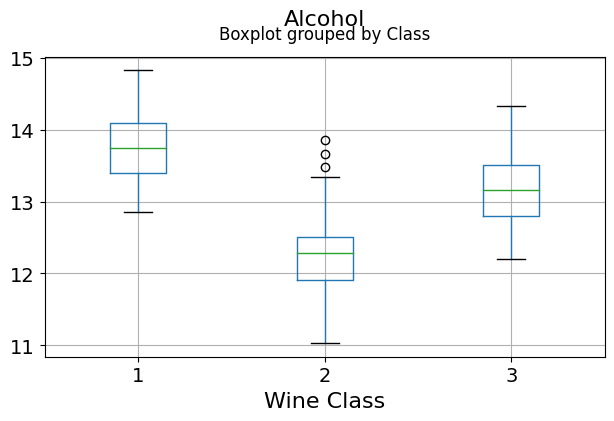

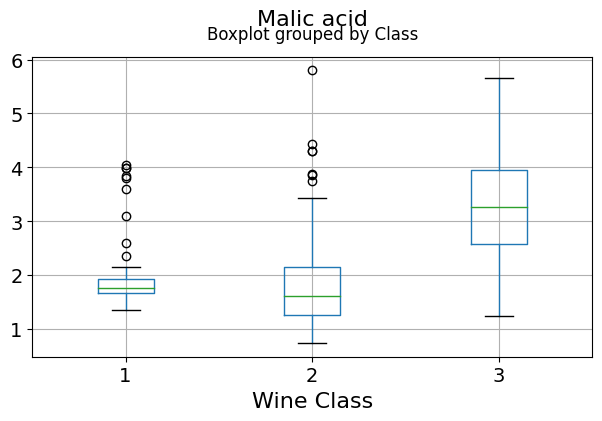

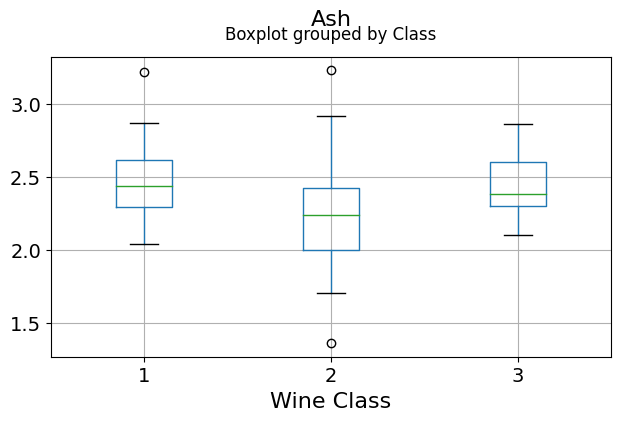

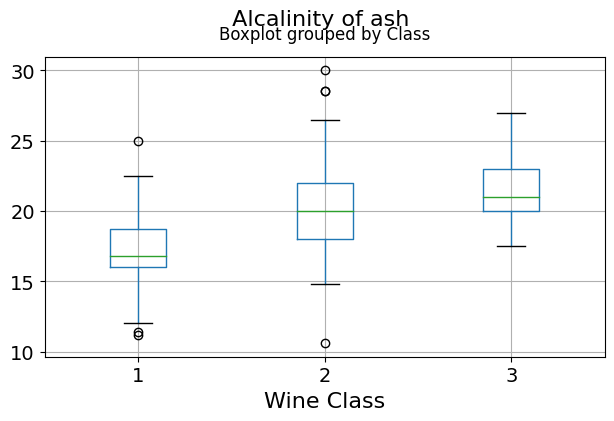

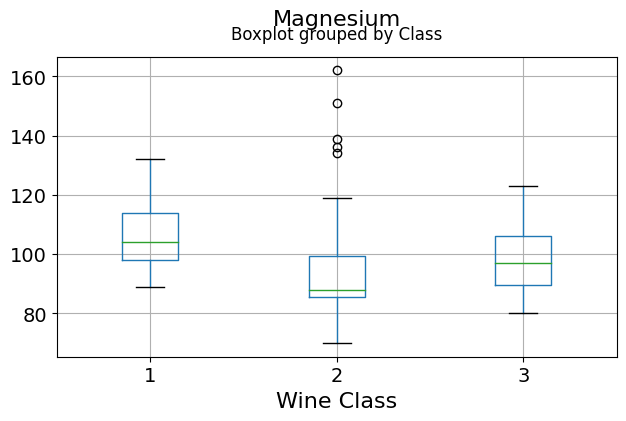

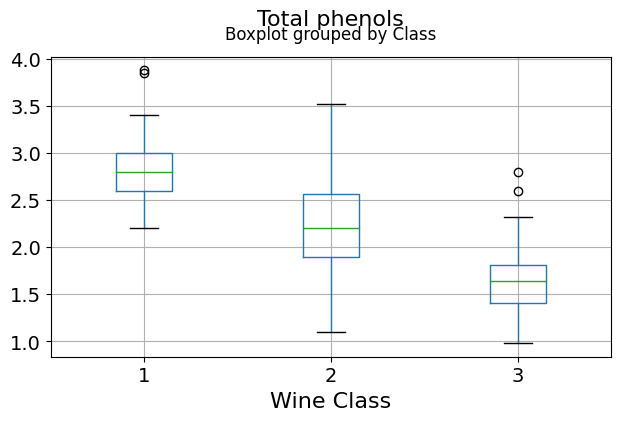

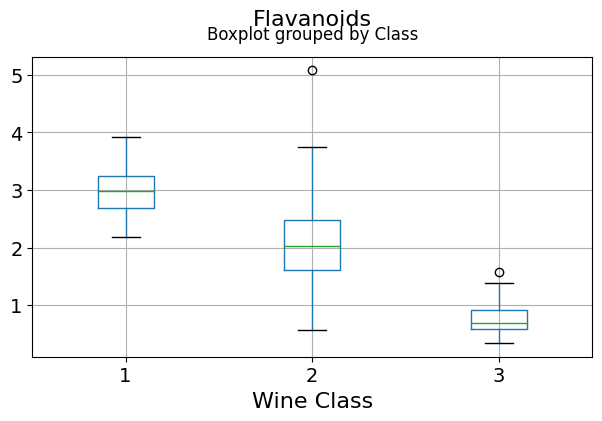

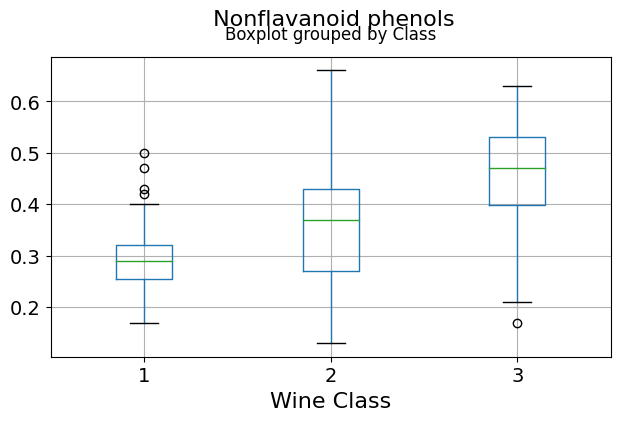

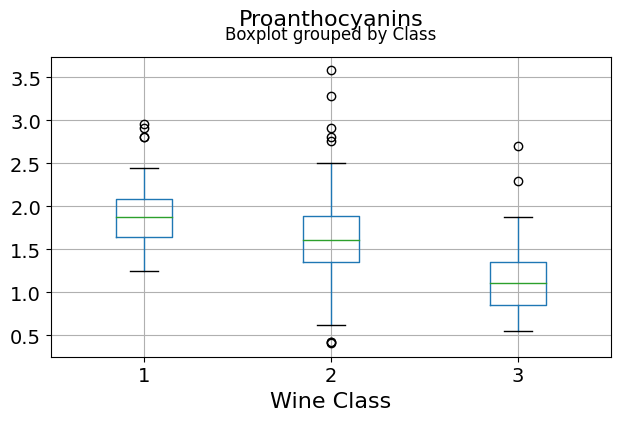

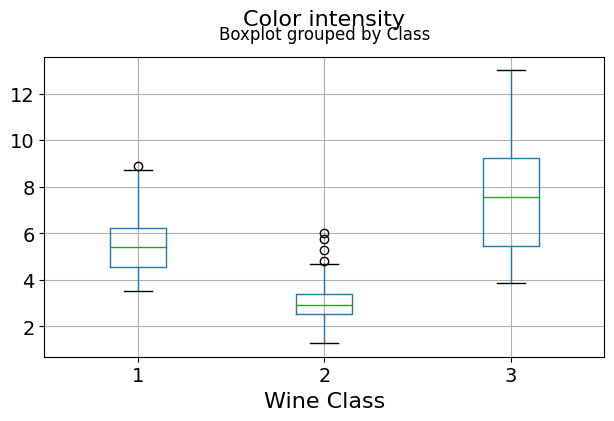

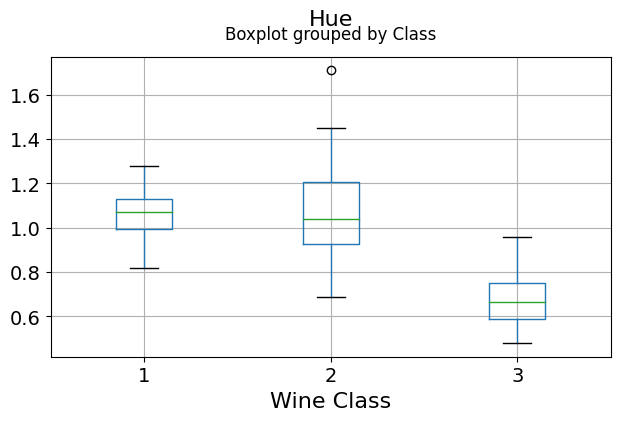

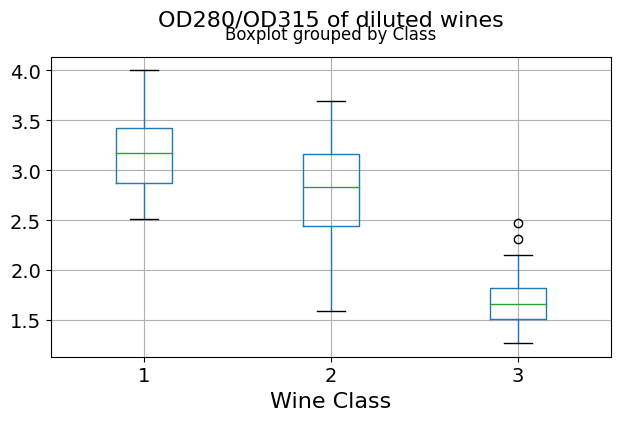

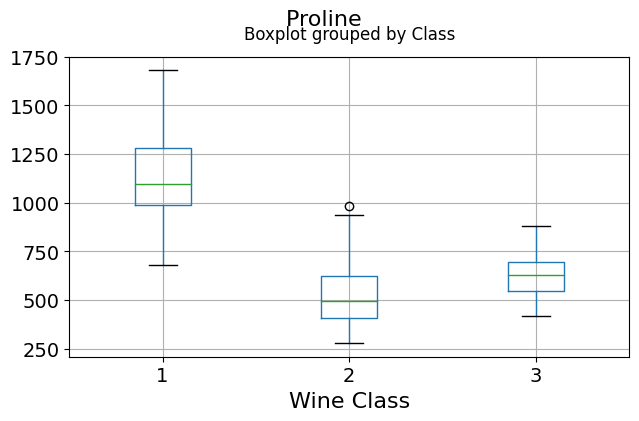

In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

Μπορεί να φανεί ότι ορισμένα χαρακτηριστικά ταξινομούν τις ετικέτες κρασιών αρκετά ξεκάθαρα. Για παράδειγμα, η αλκαλικότητα, οι ολικές φαινόλες ή τα φλαβονοειδή παράγουν boxplot με καλά διαχωρισμένους διαμέσους, οι οποίες είναι σαφώς ενδεικτικές των κατηγοριών κρασιού.

'Ενα παράδειγμα διαχωρισμού κλάσεων με χρήση δύο μεταβλητών

Text(0, 0.5, 'Flavanoids')

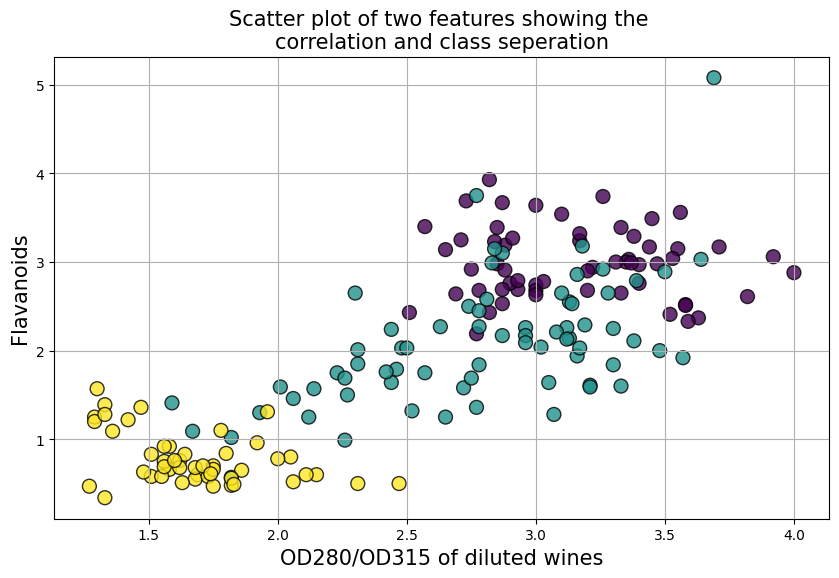

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.8,s=100)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)

#### Είναι τα χαρακτηριστικά ανεξάρτητα; Θα χρησιμοποιήσουμε τον πίνακα συνδιακύμανσης.

Ο βαθμός συσχέτισης μετριέται με έναν συντελεστή συσχέτισης (Pearson) σε μια κλίμακα που κυμαίνεται από + 1 έως – 1.

Η πλήρης συσχέτιση μεταξύ δύο μεταβλητών εκφράζεται είτε με + 1 είτε με -1.

Όταν η μία μεταβλητή αυξάνεται όσο αυξάνεται η άλλη, η συσχέτιση είναι θετική ενώ όταν η μία μεταβλητή μειώνεται όσο αυξάνεται η άλλη είναι αρνητική.

Η πλήρης απουσία συσχέτισης αντιπροσωπεύεται από το 0.

<Axes: >

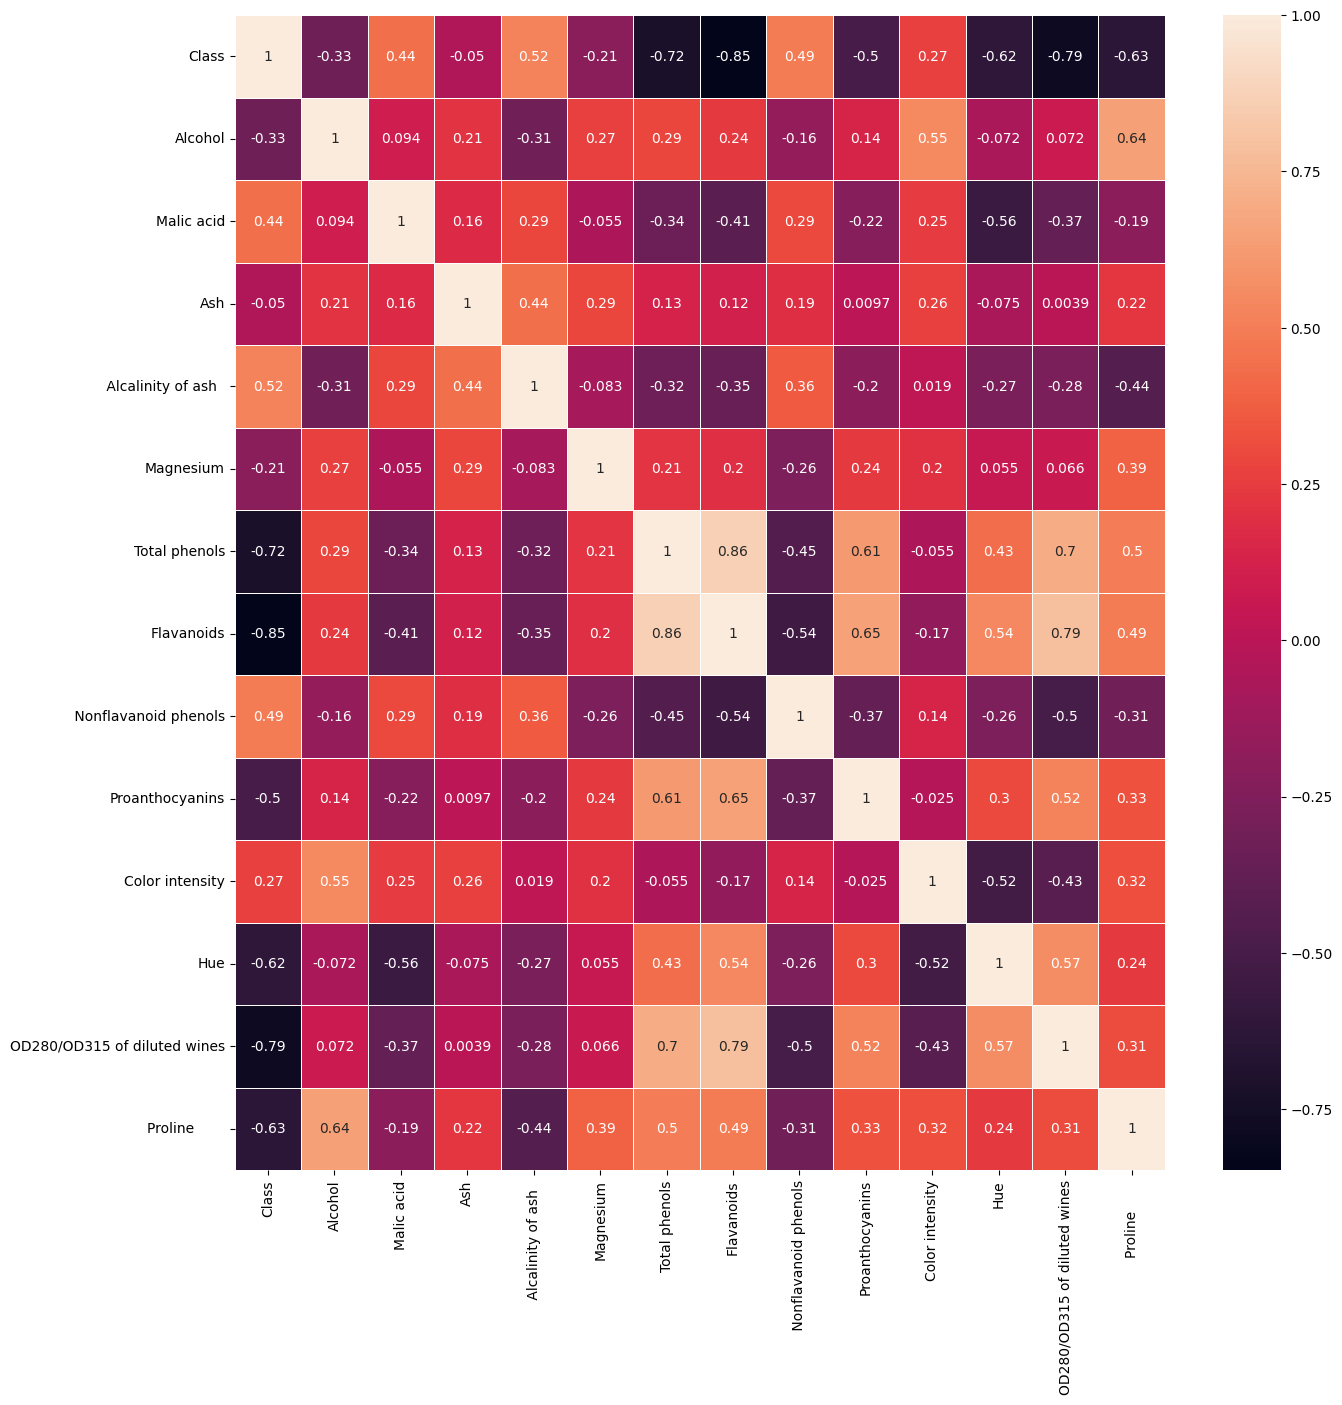

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(corr_matrix, annot=True,linewidths=.5, ax=ax)

## Naive Bayes Classification

#### Test/train split

In [ ]:
from sklearn.model_selection import train_test_split

test_size=0.3 # Test-set fraction

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [ ]:
X_train.shape

(124, 13)

In [ ]:
X_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985


#### Classification using GaussianNB

Με δεδομένη μια μεταβλητή τάξης (class) $y$ και ένα εξαρτημένο διάνυσμα χαρακτηριστικών από $x_1$ έως $x_n$, το θεώρημα του Bayes δηλώνει την ακόλουθη σχέση:
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$

Χρησιμοποιώντας την αφελή υπόθεση ανεξαρτησίας ότι

$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$ για όλα τα $i$,

αυτή η σχέση απλοποιείται :


$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n )}$$.

Εφόσον το $P(x_1, \dots, x_n)$ είναι σταθερό δεδομένης της εισόδου, μπορούμε να χρησιμοποιήσουμε τον ακόλουθο κανόνα ταξινόμησης:
$$P(y \in x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$ $$\Downarrow$$ $$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

και μπορούμε να χρησιμοποιήσουμε την εκτίμηση [**Maximum A Posteriori**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) για να υπολογίσουμε $P(y)$ και $P(x_i \mid y)$ ; Το πρώτο είναι τότε η σχετική συχνότητα της τάξης $y$ στο σετ εκπαίδευσης.


***GaussianNB ()*** εφαρμόζει τον αλγόριθμο Gaussian Naive Bayes για ταξινόμηση. Η πιθανότητα των χαρακτηριστικών θεωρείται ότι είναι Gaussian::

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}) $$


Οι παράμετροι $\sigma_y$ και $\mu_y$ μπορούν να υπολογιστούν με maximum likelihood.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbc = GaussianNB()

In [ ]:
nbc.fit(X_train,y_train)

GaussianNB()

#### Prediction, classification report, and confusion matrix

In [ ]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 54 test samples is 1


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2',' Class 3'], columns=['Class 1','Class 2',' Class 3'])
cmdf

,Class 1,Class 2,Class 3
Class 1,20,1,0
Class 2,0,19,0
Class 3,0,0,14


Αυτό έδειξε ότι ακόμη και με την παρουσία συσχέτισης μεταξύ των χαρακτηριστικών, ο αλγόριθμος Naive Bayes απέδωσε αρκετά καλά και μπόρεσε να διαχωρίσει εύκολα τις τάξεις